In [2]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# Getting the data
bank = pd.read_csv('bank_marketing_part1_Data.csv')

In [4]:
# getting the copy of the original data
df = bank.copy()

#### 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [5]:
print('Over view of first 10 records of the data set')
print(' ')
df.head(10)

Over view of first 10 records of the data set
 


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003


In [6]:
print('Over view of last 10 records of the data set')
print(' ')
df.tail(10)

Over view of last 10 records of the data set
 


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
200,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
201,17.08,15.38,0.9079,5.832,3.683,2.956,5.484
202,14.80,14.52,0.8823,5.656,3.288,3.112,5.309
203,11.55,13.10,0.8455,5.167,2.845,6.715,4.956
204,16.41,15.25,0.8866,5.718,3.525,4.217,5.618
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


In [7]:
print('Below is the detailed information about the given data set:')
print(' ')

df.info()

Below is the detailed information about the given data set:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [8]:
df.shape
print('Total number of Observations in the given data set:',df.shape[0])

print('Total number of Columns/features in the given data set:',df.shape[1])

Total number of Observations in the given data set: 210
Total number of Columns/features in the given data set: 7


In [9]:
# df.isnull().sum()

print('The total number of missing values found in the data set:')
df.isnull().sum()

The total number of missing values found in the data set:


spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [10]:
# df.duplicated().sum()

print('The total number of duplicates found in the data set:', df.duplicated().sum())

The total number of duplicates found in the data set: 0


In [11]:
# Summary stats:
print('The Summary of the data set:')
df.describe().T

The Summary of the data set:


,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [12]:
list_columns = df.columns

In [13]:
for i in list_columns:
    print('The Coefficient of Variance for the column',i, 'is ',round((df[i].std()/df[i].mean())*100),'%')

The Coefficient of Variance for the column spending is  20 %
The Coefficient of Variance for the column advance_payments is  9 %
The Coefficient of Variance for the column probability_of_full_payment is  3 %
The Coefficient of Variance for the column current_balance is  8 %
The Coefficient of Variance for the column credit_limit is  12 %
The Coefficient of Variance for the column min_payment_amt is  41 %
The Coefficient of Variance for the column max_spent_in_single_shopping is  9 %


In [14]:
def Univariate_analysis(column,bins):
    print('\033[1m','Skewness and Kurtosis for the '+column,'column:','\033[0m')
    print(" ")
    print('  Skewness:',round(df[column].skew(),4))
    print('  Kurtosis:',round(df[column].kurt(),4))
    
    
    plt.figure(figsize=(15,3))
    plt.subplot(1,2,1)
    print(" ")
    print('\033[1m',"Histogram and Boxplot for the " +column,"column",'\033[0m')
    
    sns.histplot(df[column],kde=True,color='k',bins=20)
    plt.subplot(1,2,2)
    df.boxplot(column=column,color='b')
    plt.show()

 Skewness and Kurtosis for the spending column: 
 
  Skewness: 0.3999
  Kurtosis: -1.0843
 
 Histogram and Boxplot for the spending column 


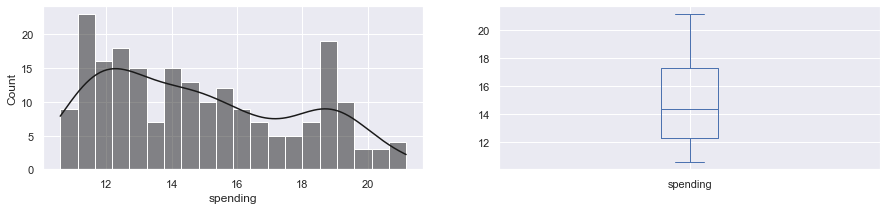

 Skewness and Kurtosis for the advance_payments column: 
 
  Skewness: 0.3866
  Kurtosis: -1.1067
 
 Histogram and Boxplot for the advance_payments column 


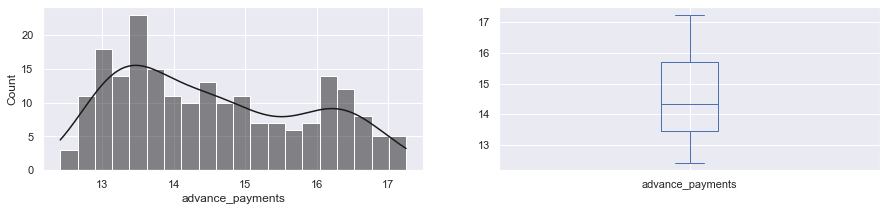

 Skewness and Kurtosis for the probability_of_full_payment column: 
 
  Skewness: -0.538
  Kurtosis: -0.1403
 
 Histogram and Boxplot for the probability_of_full_payment column 


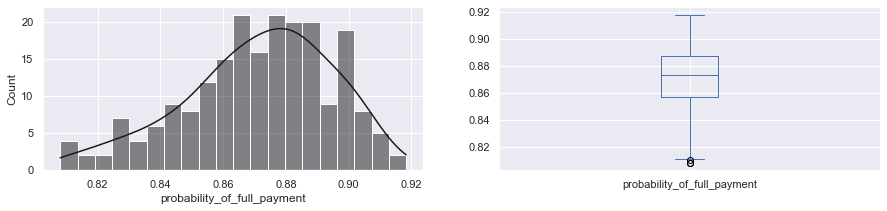

 Skewness and Kurtosis for the current_balance column: 
 
  Skewness: 0.5255
  Kurtosis: -0.7856
 
 Histogram and Boxplot for the current_balance column 


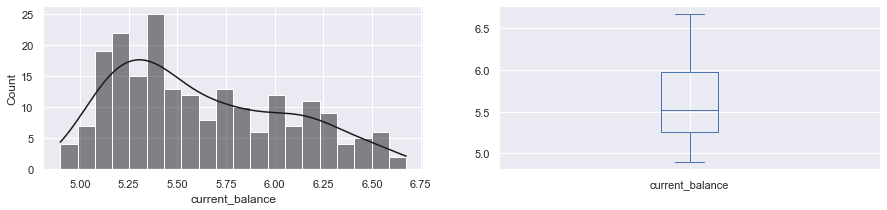

 Skewness and Kurtosis for the credit_limit column: 
 
  Skewness: 0.1344
  Kurtosis: -1.0977
 
 Histogram and Boxplot for the credit_limit column 


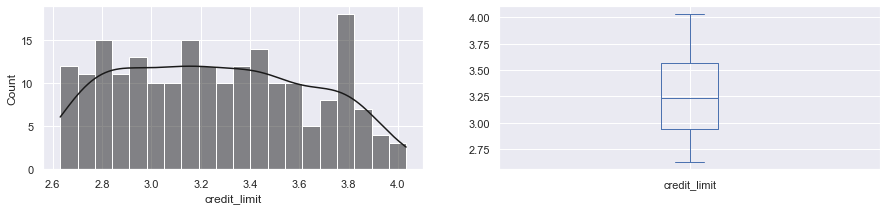

 Skewness and Kurtosis for the min_payment_amt column: 
 
  Skewness: 0.4017
  Kurtosis: -0.0666
 
 Histogram and Boxplot for the min_payment_amt column 


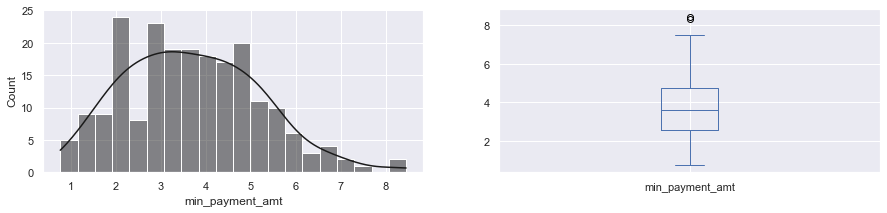

 Skewness and Kurtosis for the max_spent_in_single_shopping column: 
 
  Skewness: 0.5619
  Kurtosis: -0.8408
 
 Histogram and Boxplot for the max_spent_in_single_shopping column 


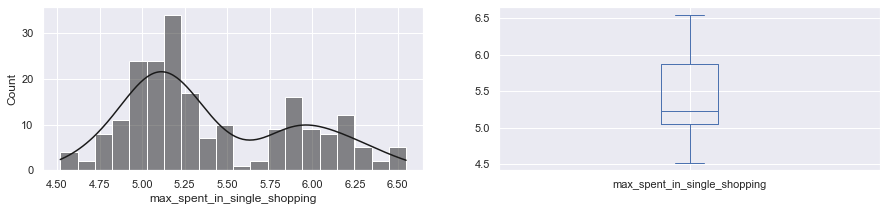

In [15]:
for i in list_columns:
    Univariate_analysis(i,20)

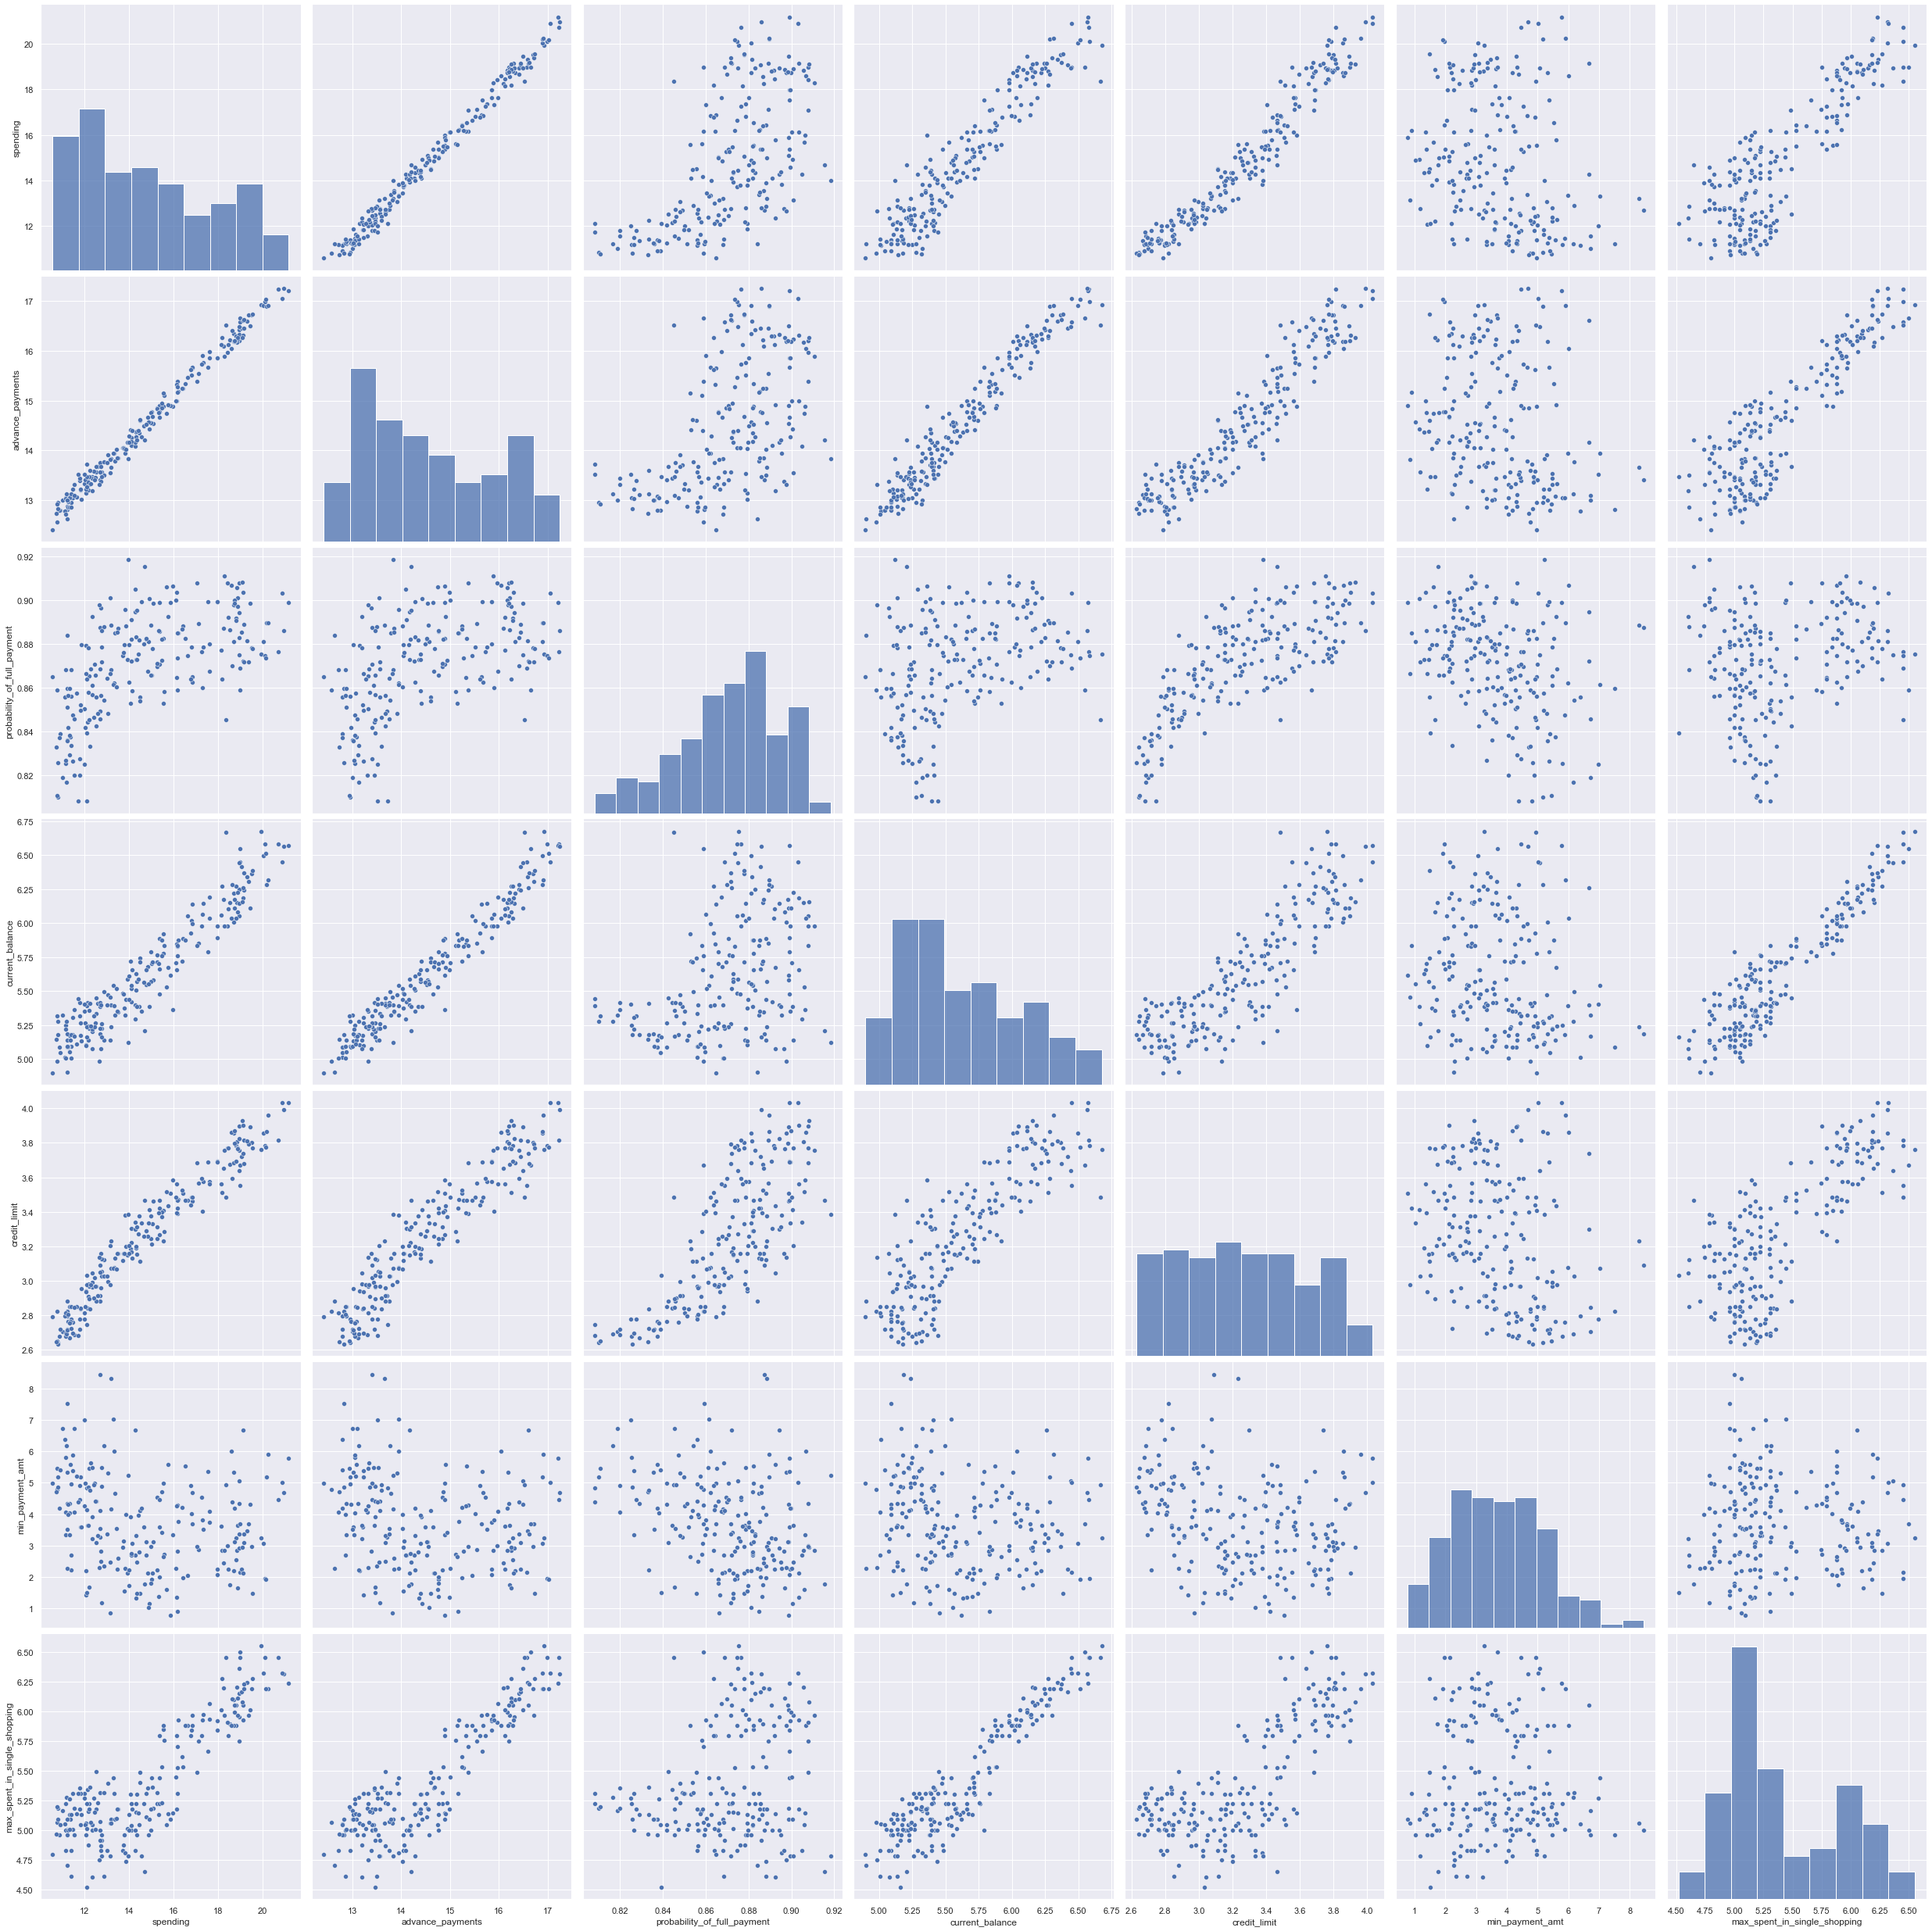

In [26]:
# Bivariate Analysis:
sns.pairplot(df,diag_kind='hist',height=5);

The Scatterplot for all the features:


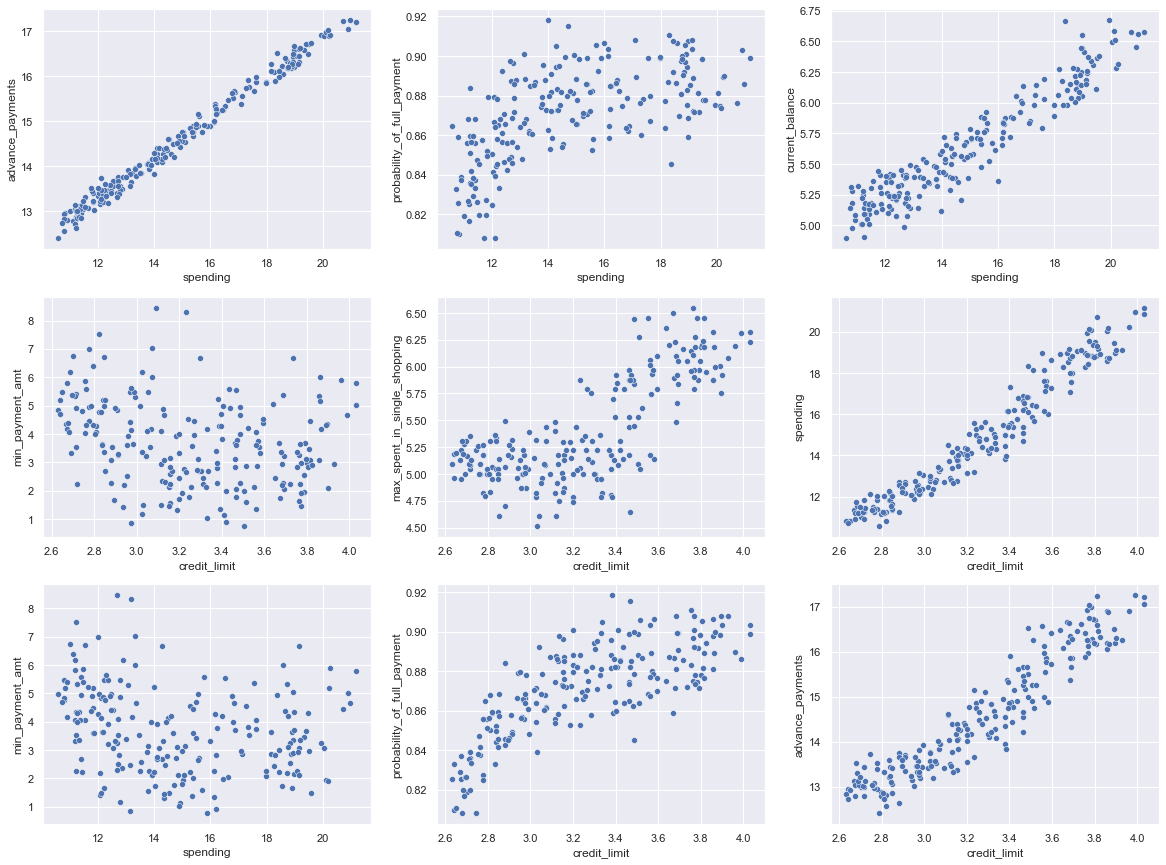

In [28]:
# Scatterplot analysis for deep understanding
print('The Scatterplot for all the features:')

plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.scatterplot(y='advance_payments',x='spending',data=df)
plt.subplot(3,3,2)
sns.scatterplot(y='probability_of_full_payment',x='spending',data=df)
plt.subplot(3,3,3)
sns.scatterplot(y='current_balance',x='spending',data=df)
plt.subplot(3,3,4)
sns.scatterplot(y='min_payment_amt',x='credit_limit',data=df)
plt.subplot(3,3,5)
sns.scatterplot(y='max_spent_in_single_shopping',x='credit_limit',data=df)
plt.subplot(3,3,6)
sns.scatterplot(y='spending',x='credit_limit',data=df)
plt.subplot(3,3,7)
sns.scatterplot(y='min_payment_amt',x='spending',data=df)
plt.subplot(3,3,8)
sns.scatterplot(y='probability_of_full_payment',x='credit_limit',data=df)
plt.subplot(3,3,9)
sns.scatterplot(y='advance_payments',x='credit_limit',data=df)
plt.show()

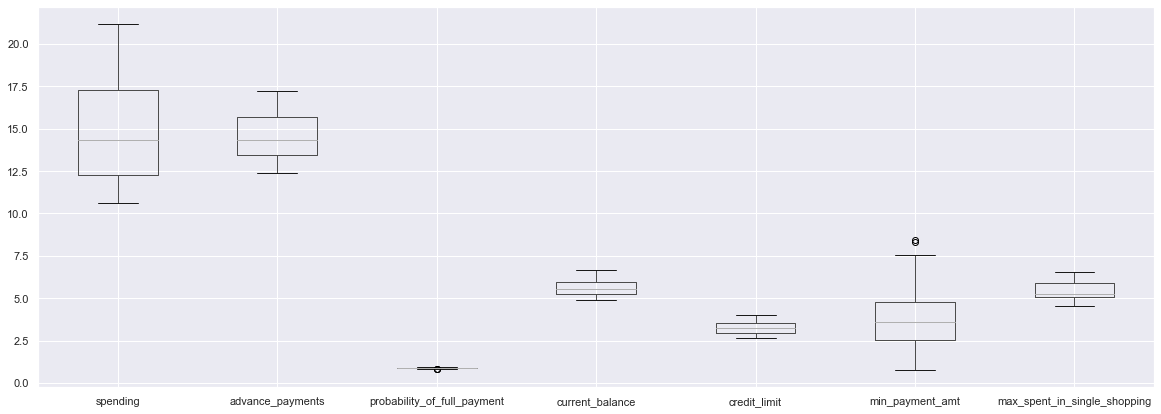

In [18]:
# outliers treatment:
# There are outliers in two features.
df.boxplot(figsize=(20,7))
plt.show()

In [29]:
# There is a outlier in the lower range for the Probability  of full payment
df['probability_of_full_payment'].min()
df['min_payment_amt'].max()

8.456

In [30]:
# Function to calculate lower_range and upper_range
def treat_outlier(column):
    sorted(column)
    Q1,Q3=np.percentile(column,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [31]:
treat_outlier(df['probability_of_full_payment'])

(0.8105875, 0.9340875)

In [32]:
treat_outlier(df['min_payment_amt'])

(-0.7493749999999992, 8.079625)

#### Outlier Treatment:

#### Probability of Full Payment:

1. The Probability percentage feature has an outlier below the minimum limit.
2. The least percentage is 80.81 and the lower range of the quantile is 81.0.
3. The percentages ranges between 0 to 1. 
4. As this data set is from Banking Industry-Credit Card type, payment probability is a key feature. Customers varied probability percentages should be considered before clustering.
5. Hence, the outlier in the Probability percentage feature is not treated.

#### Minimum Payment amount:

1. The Minimum payment column has outlier above the maximum limit. 
2. The upper range is 8.07 and the outlier amount is 8.456
3. Any payment above the Upper range in a data set can be grouped, which will not have any impact.
4. Hence, the outlier in this feature is imputed by the upper range value.

In [33]:
# Imputing the upper range in the min_payment_amt feature
lr,ur=treat_outlier(df['min_payment_amt'])
df['min_payment_amt'] = np.where(df['min_payment_amt']>ur,ur,df['min_payment_amt'])
df['min_payment_amt'].max()

8.079625

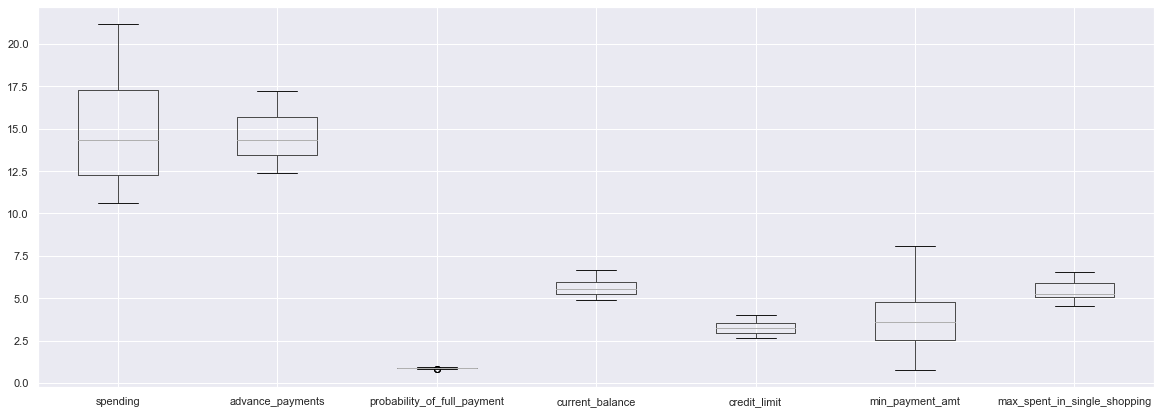

In [34]:
# after outliers treatment:
# There are outliers only in one feature i.e., Probability of Full payment 
df.boxplot(figsize=(20,7))
plt.show()

The Correlation plot:


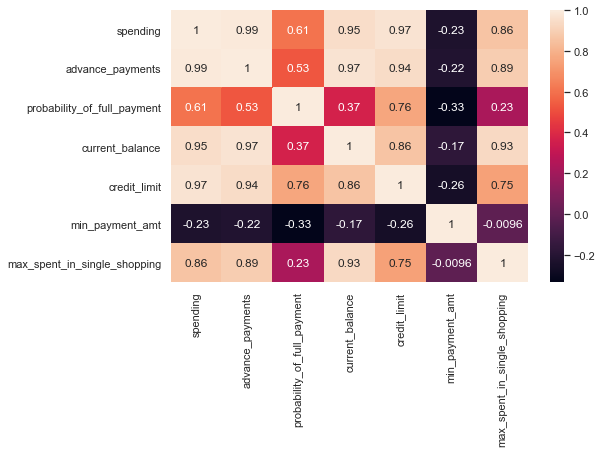

In [35]:
print('The Correlation plot:')
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

#### Correlation plot:
1. The above correlation plot displays the correlation among the different variables in a data set
2. The variable Spending is highly correlated with 4 variables, they are Advance_payments, Current balance, credit limit and Max amount spent in a single shopping.
3. The Advance payments variables are also highly correlated with the above mentioned 4 variables. 
4. Spending is the important criteria for a Credit card mechanism.
5. The most popular cards in Banking industry are the 'Spend Cards' type credit cards. The more you spend the more you save through 'Reward points.
6. Hence in our data set, the Spending and Maximum Spent in single shopping is very critical for  analysing the promotional offers.

#### Key note:
1. From the heat map it is evident that there are more than 2 highly correlated variables.
2. Multi collinearity does not impact the cluster output on a large scale, we can either ignore or treat the correlations.
3. By performing PCA we can remove the remove the Multicollinearity among the variables as each and every Principal component are orthogonal to each other.
4. For the given data set PCA is performed. Hierarchical and Kmeans clustering is performed on both the original data and the PCA applied data.
5. The model and data with good cluster profiles are selected.

#### 1.2  Do you think scaling is necessary for clustering in this case? Justify

1. Machine Learning algorithm gets affected by the magnitude of the variables. The algorithm should not be biased towards variables with higher magnitude. To overcome this problem, we can bring down all the variables to the same scale.
1. Clustering algorithms such as K-means do need feature scaling before they are fed to the algo. Since, clustering techniques use Euclidean Distance to form the cohorts, it will be wise e.g to scale the variables.
2. In this data set we have 6 monetary based features of different Denomination units and 1 Percentage feature. 
3. Clustering performed on Scaled and Not scaled data looked very close. But the clusters formed from unscaled data failed to show distinct or significant difference among the clusters.
4. The difference between the cluster properties between Scaled and Not Scaled data are shown in the report.
5. Decision to scale the data is finalized after looking into the difference.

In [36]:
def Std_Var(column):
    print('Standard Deviation for the '+column,'column',round(df[column].std(),4))
    print('Variance for the '+column,'column',round(df[column].var(),4))
    print("")

In [37]:
for i in list_columns:
    Std_Var(i)

Standard Deviation for the spending column 2.9097
Variance for the spending column 8.4664

Standard Deviation for the advance_payments column 1.306
Variance for the advance_payments column 1.7055

Standard Deviation for the probability_of_full_payment column 0.0236
Variance for the probability_of_full_payment column 0.0006

Standard Deviation for the current_balance column 0.4431
Variance for the current_balance column 0.1963

Standard Deviation for the credit_limit column 0.3777
Variance for the credit_limit column 0.1427

Standard Deviation for the min_payment_amt column 1.4947
Variance for the min_payment_amt column 2.2341

Standard Deviation for the max_spent_in_single_shopping column 0.4915
Variance for the max_spent_in_single_shopping column 0.2416



#### Scaling Notes:

1. The Standard deviation and variance for 6 variables are different
2. Standard deviation and variance for the probability_of_full_payment is very low. 
3. Hence, there are chances that the features with higher magnitude impacting the output.
4. Therefore, the data should be scaled before performing the clustering
5. The method used for Scaling is Standardization
6. Standard Scaler helps to get standardized distribution, with a zero mean and standard deviation of one (unit variance)

In [38]:
# Keeping a copy of the edited data frame
data = df.copy()

In [39]:
# scaling
from sklearn.preprocessing import StandardScaler

In [40]:
sc = StandardScaler()

In [41]:
scaled_df = sc.fit_transform(data)
print('The mean for the Scaled data',scaled_df.mean())
print('The Standard deviation for the Scaled data',scaled_df.std())

The mean for the Scaled data 2.4168120263948984e-18
The Standard deviation for the Scaled data 1.0


#### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

#### Clustering (Original Scaled data)

In [42]:
linkage_original = linkage(scaled_df,method='ward',metric='euclidean')

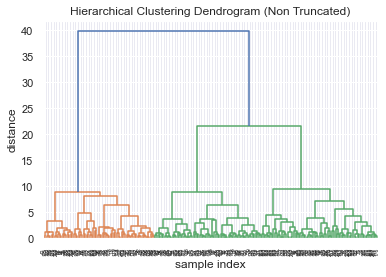

In [43]:
plt.title('Hierarchical Clustering Dendrogram (Non Truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dend_original = dendrogram(linkage_original)

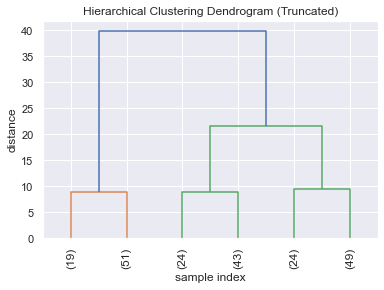

In [44]:
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dend_original = dendrogram(linkage_original,truncate_mode='lastp',p=6,
                           leaf_rotation=90,leaf_font_size=12)

In [48]:
f_cluster = fcluster(linkage_original,3,criterion='maxclust')
# we have three different color representation showing three clusters

In [49]:
data['f_cluster'] = f_cluster
data['f_cluster'].value_counts()

f_cluster_analysis = data.groupby('f_cluster').mean()

f_cluster_analysis['cluster_frq'] = data['f_cluster'].value_counts()
round(f_cluster_analysis,3).T

f_cluster,1,2,3
spending,18.371,11.872,14.199
advance_payments,16.145,13.257,14.234
probability_of_full_payment,0.884,0.848,0.879
current_balance,6.158,5.239,5.478
credit_limit,3.685,2.849,3.226
min_payment_amt,3.639,4.940,2.612
max_spent_in_single_shopping,6.017,5.122,5.086
cluster_frq,70.000,67.000,73.000


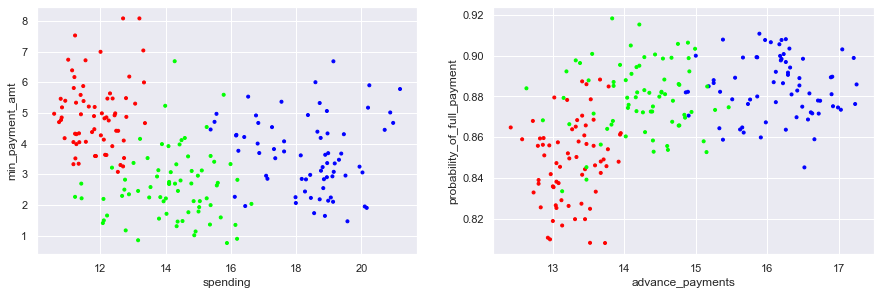

In [50]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.xlabel('spending')
plt.ylabel('min_payment_amt')
plt.scatter(data['spending'],data['min_payment_amt'],c=f_cluster,cmap='brg',marker='.')

plt.subplot(2,2,2)
plt.scatter(data['advance_payments'],data['probability_of_full_payment'],c=f_cluster, cmap='brg',marker='.')
plt.xlabel('advance_payments')
plt.ylabel('probability_of_full_payment')

plt.show()

#### Clustering ( On the reduced data from PCA)

In [51]:
df_pca = df.copy()

In [52]:
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [53]:
scaled_df_pca = df_pca.apply(zscore)

In [54]:
cov_matrix = np.cov(df_pca.T)
eigen_values,eigen_vectors = np.linalg.eig(cov_matrix)
Percentage_of_eigenvalues_with_total = [(i/sum(eigen_values)) *100 for i in sorted(eigen_values,reverse=True)]
cumulative = np.cumsum(Percentage_of_eigenvalues_with_total)
cumulative

array([ 83.0920605 ,  99.30177621,  99.86725184,  99.96651674,
        99.98767597,  99.99977204, 100.        ])

In [55]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_df_pca)
df_PC = pd.DataFrame(pca.components_,columns=scaled_df_pca.columns)
df_PC

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,0.444468,0.441555,0.277113,0.423529,0.432840,-0.118770,0.387108
1,-0.026704,-0.084184,0.529489,-0.206139,0.116688,-0.716583,-0.377148


In [66]:
PCA_2 = pd.DataFrame(reduced_data)

In [56]:
from matplotlib.patches import Rectangle

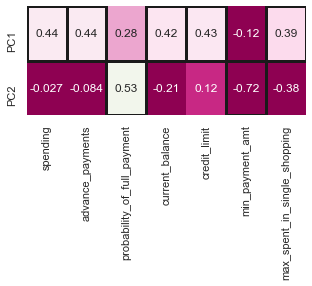

In [57]:
# heatmap showing the components and their captured variances of various features.
fig,ax = plt.subplots(figsize=(5,2), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_PC, annot=True, vmax=1.0, vmin=0, cmap='PiYG', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC1','PC2'])

column_max = df_PC.abs().idxmax(axis=0)

for col, variable in enumerate(df_PC.columns):
    position = df_PC.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='k', lw=3))

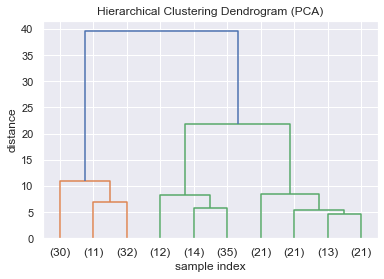

In [67]:
linkage_pca = linkage(PCA_2,method='ward',metric='euclidean')
plt.title('Hierarchical Clustering Dendrogram (PCA)')
plt.xlabel('sample index')
plt.ylabel('distance')
dend_pca = dendrogram(linkage_pca,truncate_mode='lastp',p=10)

In [68]:
f_cluster_pca = fcluster(linkage_pca,3,criterion='maxclust')
# # we have three different color representation showing three clusters

In [69]:
df_pca['f_cluster_pca'] = f_cluster_pca

In [70]:
f_cluster_pca_analysis = df_pca.groupby('f_cluster_pca').mean()

f_cluster_pca_analysis['cluster_frq'] = df_pca['f_cluster_pca'].value_counts()
round(f_cluster_pca_analysis,3).T

f_cluster_pca,1,2,3
spending,18.238,14.298,12.031
advance_payments,16.100,14.243,13.333
probability_of_full_payment,0.883,0.884,0.849
current_balance,6.146,5.463,5.264
credit_limit,3.663,3.258,2.871
min_payment_amt,3.670,2.383,4.779
max_spent_in_single_shopping,6.003,5.055,5.119
cluster_frq,73.000,61.000,76.000


#### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [71]:
df_kmeans = df.copy()

#### K-means Clustering (Original Scaled Data)

In [72]:
from sklearn.cluster import KMeans

In [73]:
Wss1 = []

In [74]:
for i in range(1,11):
    Km1 = KMeans(n_clusters=i,random_state=1)
    Km1.fit(df_kmeans.iloc[:,0:7])
    Wss1.append(Km1.inertia_)

In [75]:
Wss1

[2714.2953432384293,
 1006.3803191581746,
 583.054812848507,
 467.38804016996835,
 382.35713714071056,
 320.1201168496462,
 275.66333407669157,
 238.1349341515892,
 214.69911301524283,
 198.0796093825974]

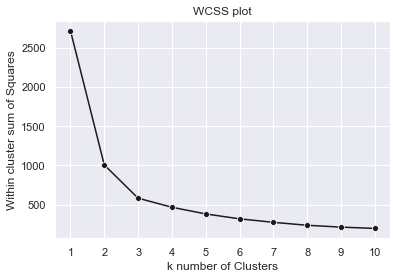

In [76]:
plt.title('WCSS plot')
plt.xlabel('k number of Clusters')
plt.ylabel('Within cluster sum of Squares')
plt.xticks(range(1,11))
sns.lineplot(x=range(1,11),y=Wss1,marker='o',color='k')
plt.show()

In [77]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [78]:
k_means_2 = KMeans(n_clusters=2,random_state=1).fit(df_kmeans.iloc[:,0:7])
k_means_3 = KMeans(n_clusters=3,random_state=1).fit(df_kmeans.iloc[:,0:7])
k_means_4 = KMeans(n_clusters=4,random_state=1).fit(df_kmeans.iloc[:,0:7])
k_means_5 = KMeans(n_clusters=5,random_state=1).fit(df_kmeans.iloc[:,0:7])

In [80]:
print('silhouette_score for K_clusters=2:',round(silhouette_score(df_kmeans.iloc[:,0:7],k_means_2.labels_),4))
print('silhouette_score for K_clusters=3:',round(silhouette_score(df_kmeans.iloc[:,0:7],k_means_3.labels_),4))
print('silhouette_score for K_clusters=4:',round(silhouette_score(df_kmeans.iloc[:,0:7],k_means_4.labels_),4))
print('silhouette_score for K_clusters=5:',round(silhouette_score(df_kmeans.iloc[:,0:7],k_means_5.labels_),4))

silhouette_score for K_clusters=2: 0.5188
silhouette_score for K_clusters=3: 0.4725
silhouette_score for K_clusters=4: 0.4133
silhouette_score for K_clusters=5: 0.3619


In [81]:
# the minimum value for the silhoutte sample for the n_clusters

print('The minimum silhoutte sample value when n_cluster=2 is:',
     round(silhouette_samples(df_kmeans.iloc[:,0:7],k_means_2.labels_).min(),4))
print('The silhoutte score is negative because, One sample from the data set is wrongly assigned to different cluster')
print('')
print('The minimum silhoutte sample value when n_cluster=3 is:',
     round(silhouette_samples(df_kmeans.iloc[:,0:7],k_means_3.labels_).min(),4))
print('No samples are wrongly assigned to different cluster when cluster size is 3')

The minimum silhoutte sample value when n_cluster=2 is: -0.0204
The silhoutte score is negative because, One sample from the data set is wrongly assigned to different cluster

The minimum silhoutte sample value when n_cluster=3 is: 0.0237
No samples are wrongly assigned to different cluster when cluster size is 3


In [82]:
# so we choose 3 clusters.
df_kmeans['kmeans_3'] = k_means_3.labels_


In [83]:
k_means3_analysis = df_kmeans.groupby('kmeans_3').mean()

k_means3_analysis['Cluster_freq'] = df_kmeans['kmeans_3'].value_counts().sort_values()
round(k_means3_analysis,3).T

kmeans_3,0,1,2
spending,11.964,18.722,14.648
advance_payments,13.275,16.297,14.460
probability_of_full_payment,0.852,0.885,0.879
current_balance,5.229,6.209,5.564
credit_limit,2.873,3.723,3.278
min_payment_amt,4.752,3.604,2.649
max_spent_in_single_shopping,5.089,6.066,5.192
Cluster_freq,77.000,61.000,72.000


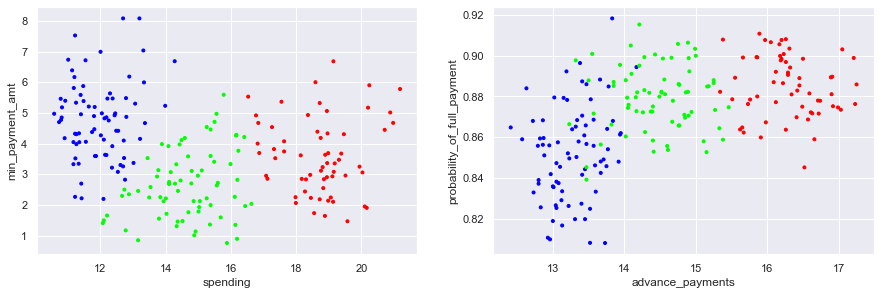

In [84]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.xlabel('spending')
plt.ylabel('min_payment_amt')
plt.scatter(df_kmeans['spending'],df_kmeans['min_payment_amt'],c=k_means_3.labels_, cmap='brg',marker='.')

plt.subplot(2,2,2)
plt.scatter(df_kmeans['advance_payments'],df_kmeans['probability_of_full_payment'],c=k_means_3.labels_, cmap='brg',marker='.')
plt.xlabel('advance_payments')
plt.ylabel('probability_of_full_payment')

plt.show()

#### K-means Clustering (PCA applied Data)

<AxesSubplot:>

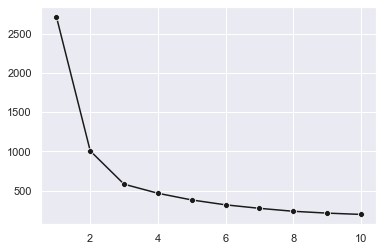

In [86]:
sns.lineplot(x=range(1,11),y=Wss1,marker='o',color='k')

In [90]:
df_kmeans_pca = df_kmeans.copy()

In [92]:
# Kmeans on PCA applied data:
kmeans_3_pca = KMeans(n_clusters=3,random_state=1).fit(PCA_2)
kmeans_2_pca = KMeans(n_clusters=2,random_state=1).fit(PCA_2)
kmeans_4_pca = KMeans(n_clusters=4,random_state=1).fit(PCA_2)

In [94]:
print('The minimum silhoutte sample value when n_cluster=2 is:',
     round(silhouette_samples(df_kmeans_pca.iloc[:,0:7],kmeans_2_pca.labels_).min(),4))
print('The silhoutte score is negative because, samples in the data set is wrongly assigned to different cluster')
print('')
print('The minimum silhoutte sample value when n_cluster=3 is:',
     round(silhouette_samples(df_kmeans_pca.iloc[:,0:7],kmeans_3_pca.labels_).min(),4))
print('The silhoutte score is negative because, samples in the data set is wrongly assigned to different cluster')


The minimum silhoutte sample value when n_cluster=2 is: -0.165
The silhoutte score is negative because, samples in the data set is wrongly assigned to different cluster

The minimum silhoutte sample value when n_cluster=3 is: -0.2668
The silhoutte score is negative because, samples in the data set is wrongly assigned to different cluster


#####  As n_cluster sizes (2,3,4) in Kmeans has wrong assignment of clusters within the observations. The Kmeans from PCA applied data is not considered for further analysis.

### Cluster Profiling and Analysis on clusters formed through Hierarchical Clustering technique

In [95]:
# adding the clusters extracted from hierarchical clustering to original data for further analysis

In [96]:
df_analysis = df.copy()

In [97]:
df_analysis['Cluster_HC'] = f_cluster

df_analysis.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Cluster_HC
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [172]:
Cluster_HC = df_analysis.groupby(['Cluster_HC']).mean()

In [173]:
round(Cluster_HC.T,3)

Cluster_HC,Target_1,Target_3,Target_2
spending,18.371,11.872,14.199
advance_payments,16.145,13.257,14.234
probability_of_full_payment,0.884,0.848,0.879
current_balance,6.158,5.239,5.478
credit_limit,3.685,2.849,3.226
min_payment_amt,3.639,4.940,2.612
max_spent_in_single_shopping,6.017,5.122,5.086


In [99]:
df_analysis['Cluster_HC'] = pd.Categorical(df_analysis['Cluster_HC'])

In [100]:
# assiging appropriate names to the different clusters as per their features
df_analysis['Cluster_HC'] = df_analysis['Cluster_HC'].replace(to_replace=1,value='Target_1')
df_analysis['Cluster_HC'] = df_analysis['Cluster_HC'].replace(to_replace=3,value='Target_2')
df_analysis['Cluster_HC'] = df_analysis['Cluster_HC'].replace(to_replace=2,value='Target_3')

In [115]:
def cluster_compare(column):
    print('\033[1m','The Barplot and Boxplot+Strip-plot analysis for the '+column,'column among 3 clusters','\033[0m')
    plt.figure(figsize=(20,3))
    plt.subplot(1,2,1)
    sns.barplot(y=df_analysis['Cluster_HC'],x=df_analysis[column],ci=None,order=['Target_1','Target_2','Target_3'],palette='magma')
    
    plt.subplot(1,2,2)
    ax = sns.boxplot(y=df_analysis['Cluster_HC'],x=df_analysis[column],order=['Target_1','Target_2','Target_3'],palette='magma')
    ax = sns.stripplot(y=df_analysis['Cluster_HC'],x=df_analysis[column],color='k',order=['Target_1','Target_2','Target_3'])
    plt.show()

 The Barplot and Boxplot+Strip-plot analysis for the spending column among 3 clusters 


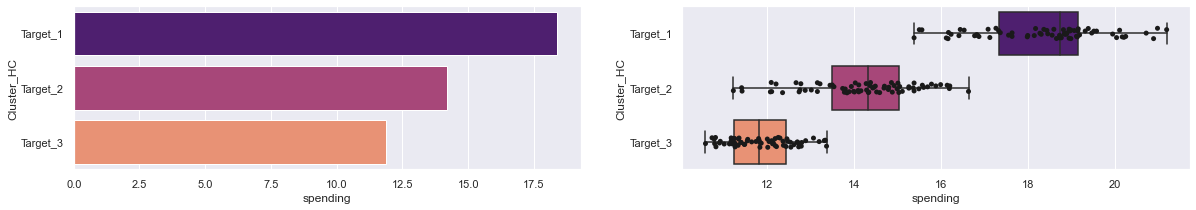

 The Barplot and Boxplot+Strip-plot analysis for the advance_payments column among 3 clusters 


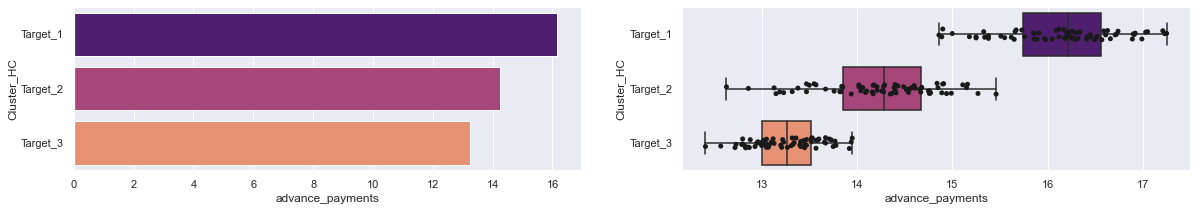

 The Barplot and Boxplot+Strip-plot analysis for the probability_of_full_payment column among 3 clusters 


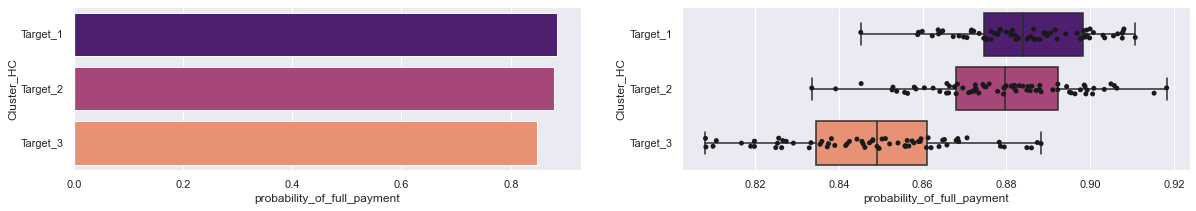

 The Barplot and Boxplot+Strip-plot analysis for the current_balance column among 3 clusters 


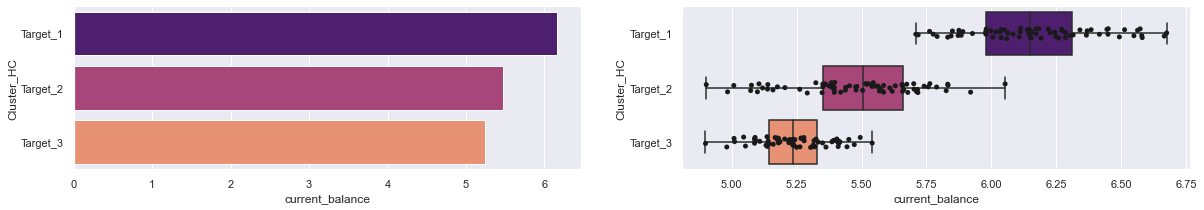

 The Barplot and Boxplot+Strip-plot analysis for the credit_limit column among 3 clusters 


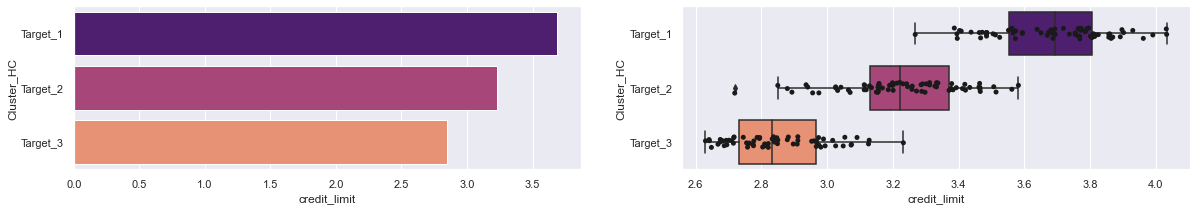

 The Barplot and Boxplot+Strip-plot analysis for the min_payment_amt column among 3 clusters 


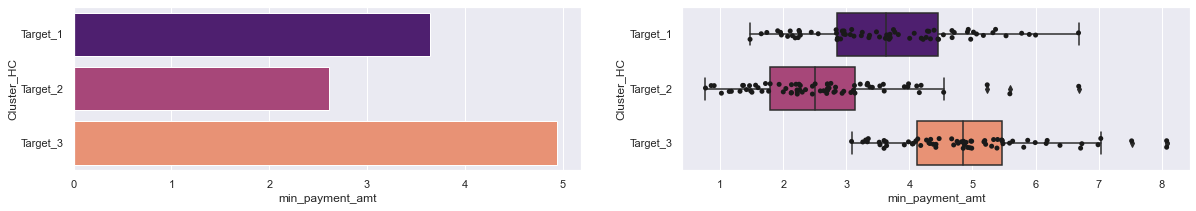

 The Barplot and Boxplot+Strip-plot analysis for the max_spent_in_single_shopping column among 3 clusters 


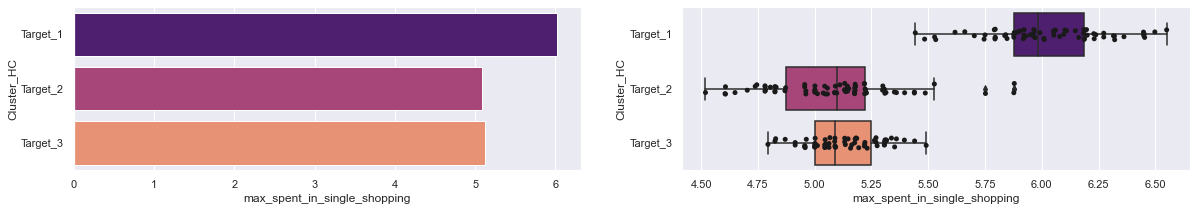

In [116]:
for i in list_columns:
    cluster_compare(i)

In [132]:
more_89 = df_analysis[df_analysis['probability_of_full_payment'] > .89]

In [137]:
more_89_1 = more_89[more_89['Cluster_HC'] == 'Target_1']
more_89_2 = more_89[more_89['Cluster_HC'] == 'Target_2']

In [138]:
df_analysis[df_analysis['probability_of_full_payment'] > .89].groupby('Cluster_HC').count()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
Cluster_HC,,,,,,,
Target_1,24,24,24,24,24,24,24
Target_3,0,0,0,0,0,0,0
Target_2,20,20,20,20,20,20,20


Comparison between Target1 and Target2 based on Probability of full payment and Spending


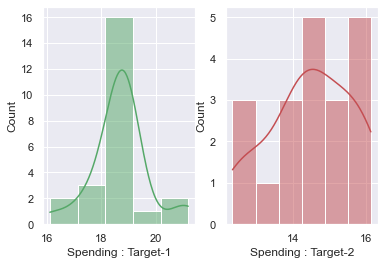

In [140]:
print('Comparison between Target1 and Target2 based on Probability of full payment and Spending')
plt.subplot(1,2,1)
sns.histplot(x=more_89_1['spending'],bins=5,kde=True,color='g')
plt.xlabel('Spending : Target-1')

plt.subplot(1,2,2)
sns.histplot(x=more_89_2['spending'],kde=True,color='r')
plt.xlabel('Spending : Target-2')
plt.show()

Comparison between Target1 and Target2 based on Probability of full payment and Max Single Spending


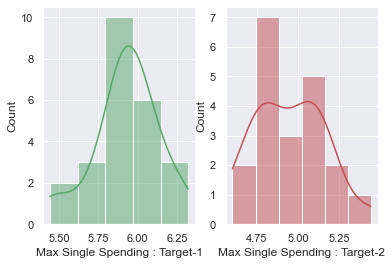

In [142]:
print('Comparison between Target1 and Target2 based on Probability of full payment and Max Single Spending')
plt.subplot(1,2,1)
sns.histplot(x=more_89_1['max_spent_in_single_shopping'],bins=5,kde=True,color='g')
plt.xlabel('Max Single Spending : Target-1')

plt.subplot(1,2,2)
sns.histplot(x=more_89_2['max_spent_in_single_shopping'],kde=True,color='r')
plt.xlabel('Max Single Spending : Target-2')
plt.show()

In [143]:
# why 6? Minimum payment amount of 1 and 2 Target profiles are less than 4
# Hence, to verify if there are any unique cases where feature value is more than 6 and classfied under Target 1 and 2
min_pay_more_6 = df_analysis[df_analysis['min_payment_amt'] > 6]
min_pay_more_6.groupby('Cluster_HC').count()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
Cluster_HC,,,,,,,
Target_1,2,2,2,2,2,2,2
Target_3,10,10,10,10,10,10,10
Target_2,1,1,1,1,1,1,1


In [144]:
min_pay_more_6[min_pay_more_6['spending'] > 14]

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Cluster_HC
83,18.59,16.05,0.9066,6.037,3.860,6.001,5.877,Target_1
117,14.28,14.17,0.8944,5.397,3.298,6.685,5.001,Target_2
136,19.14,16.61,0.8722,6.259,3.737,6.682,6.053,Target_1


1. Customers who have high Minimum amount of payment is segemented into Target 3. But there are 3 exceptions.
2. Two customers spend more than 18500 and make high advance payments but still uses the time extension method of payment.
3. Interesting fact is they also have more than 87% of probability of full payments. 
4. They make use of the time extention and repays the full amount. 
5. One customer who is categorized into Target 2 inspite of making high minimum payments is due to his/her 89.5% probability of full payment.

In [145]:
# deep analysis of Target 3 customers based on Prob of full payment
less_83 = df_analysis[df_analysis['probability_of_full_payment'] < .83]

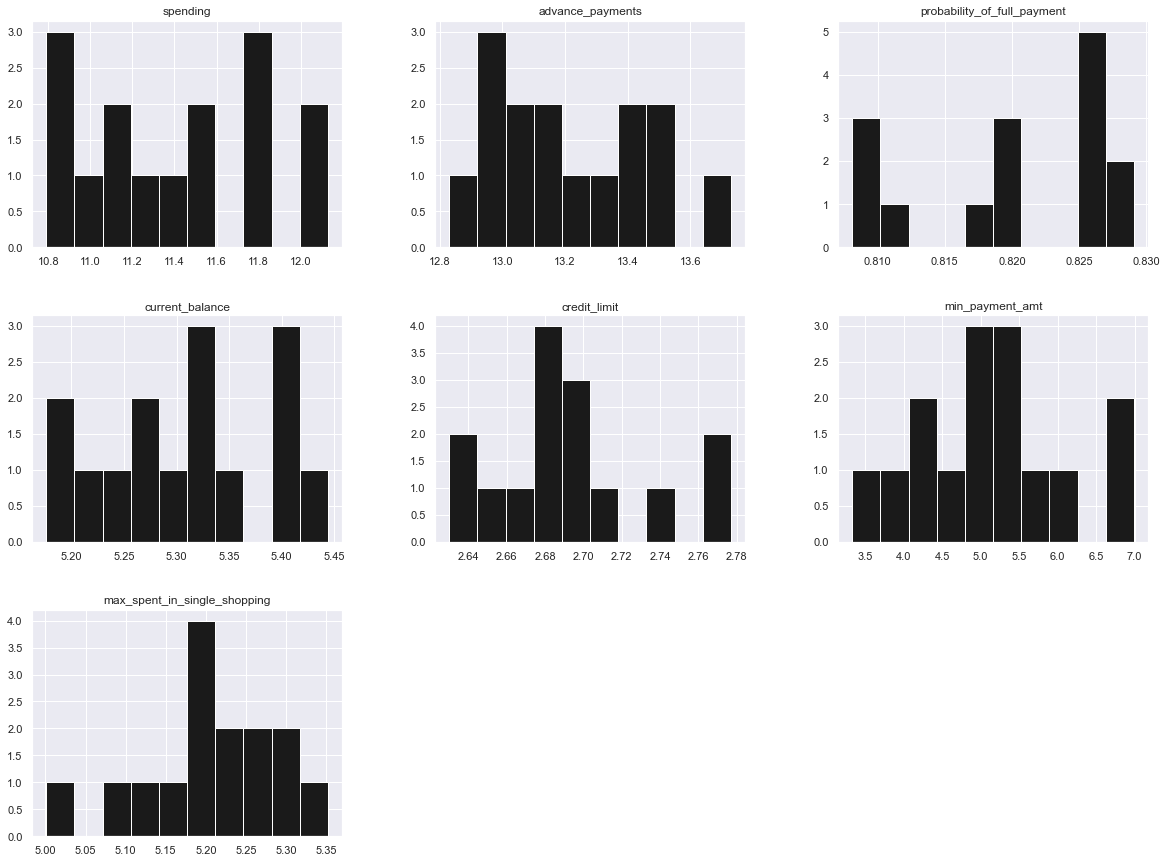

In [174]:
less_83.hist(figsize=(20,15),color='k')
plt.show()

#### End